# 热带雨林降雨预测 - 探索性数据分析

本notebook包含对数据集的详细分析，包括：
1. 数据概览
2. 特征分析
3. 目标变量分析
4. 特征相关性分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置显示格式
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# 加载数据
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

print("训练集形状:", train_data.shape)
print("测试集形状:", test_data.shape)
print("\n训练集前5行:")
display(train_data.head())

训练集形状: (2190, 13)
测试集形状: (730, 12)

训练集前5行:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [3]:
# 数据基本信息
print("训练集信息:")
print(train_data.info())
print("\n基本统计描述:")
display(train_data.describe())

训练集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
None

基本统计描述:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [4]:
# 检查缺失值
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

print("训练集缺失值:")
print(missing_train[missing_train > 0])
print("\n测试集缺失值:")
print(missing_test[missing_test > 0])

训练集缺失值:
Series([], dtype: int64)

测试集缺失值:
winddirection    1
dtype: int64


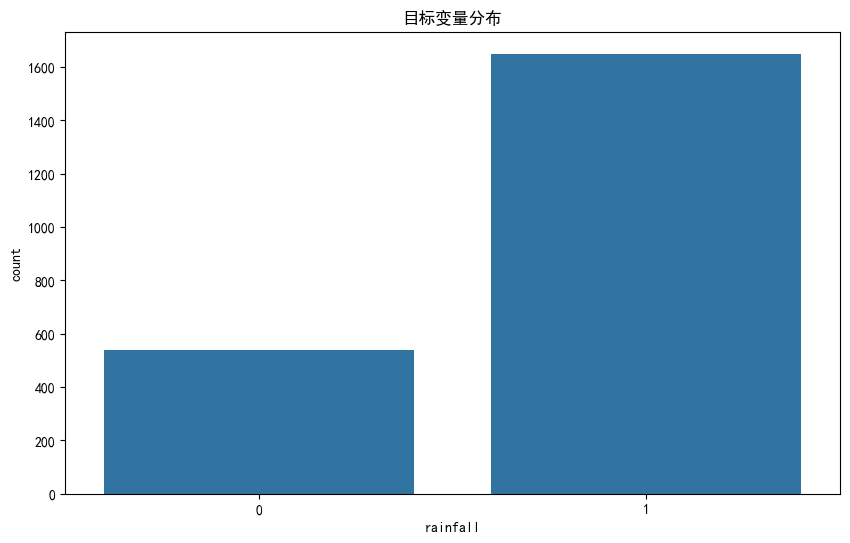


目标变量比例:
rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


In [5]:
# 目标变量分布
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='rainfall')
plt.title('目标变量分布')
plt.show()

print("\n目标变量比例:")
print(train_data['rainfall'].value_counts(normalize=True))

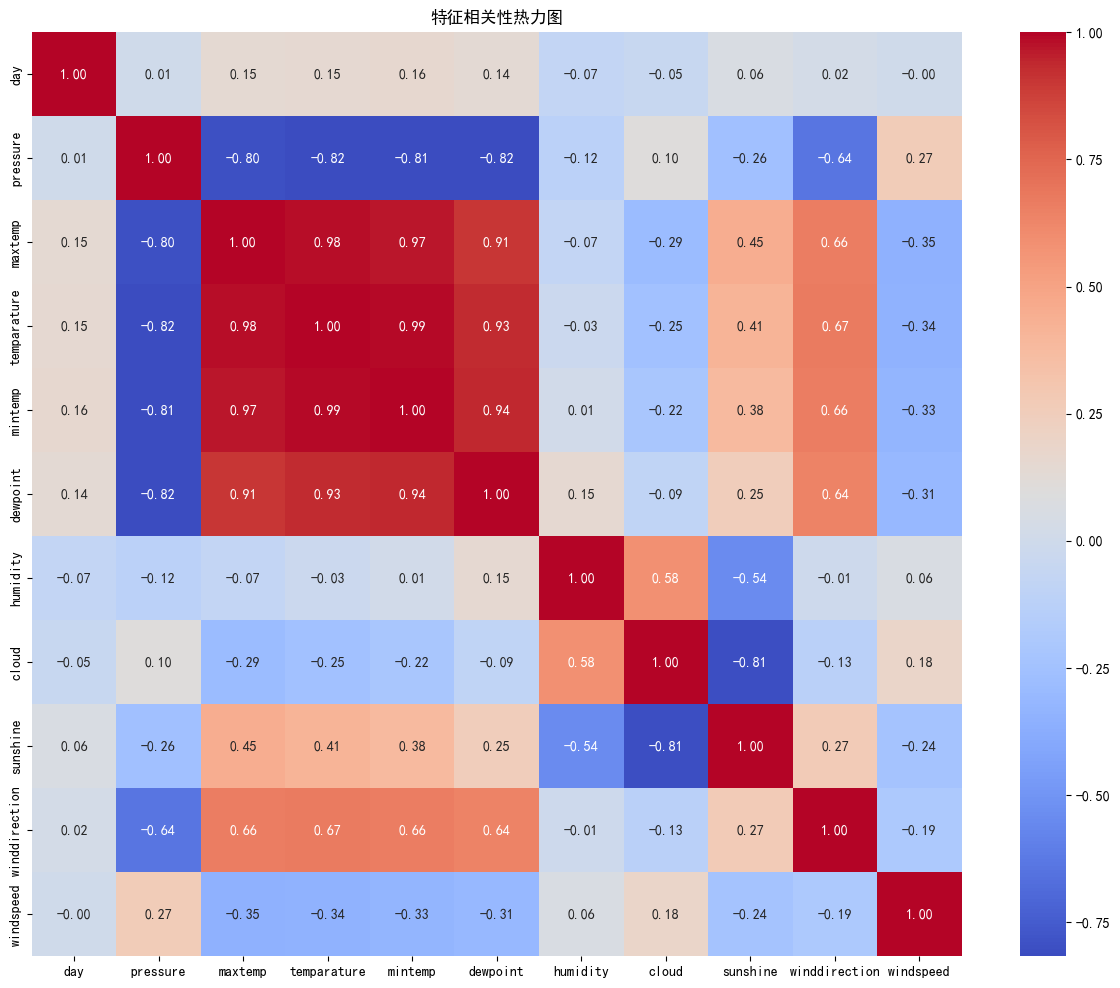

In [6]:
# 特征相关性分析
features = train_data.drop(['id', 'rainfall'], axis=1)
correlation = features.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('特征相关性热力图')
plt.show()

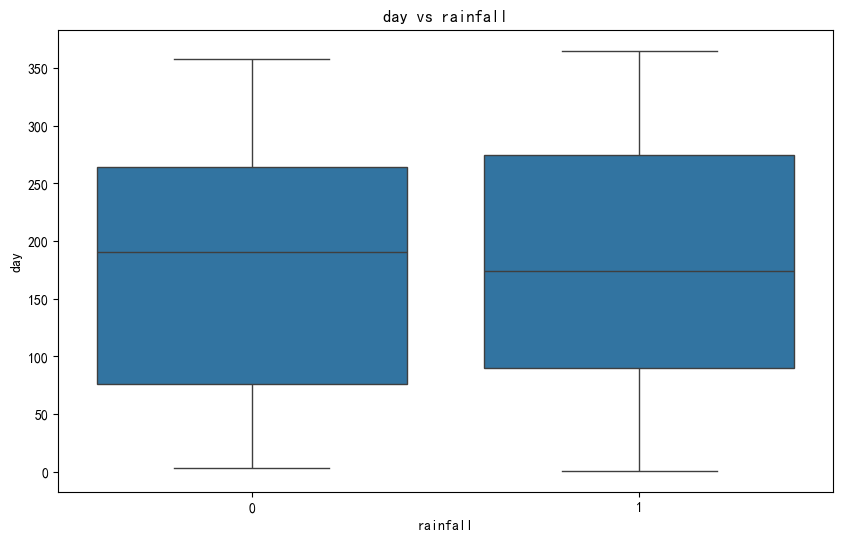

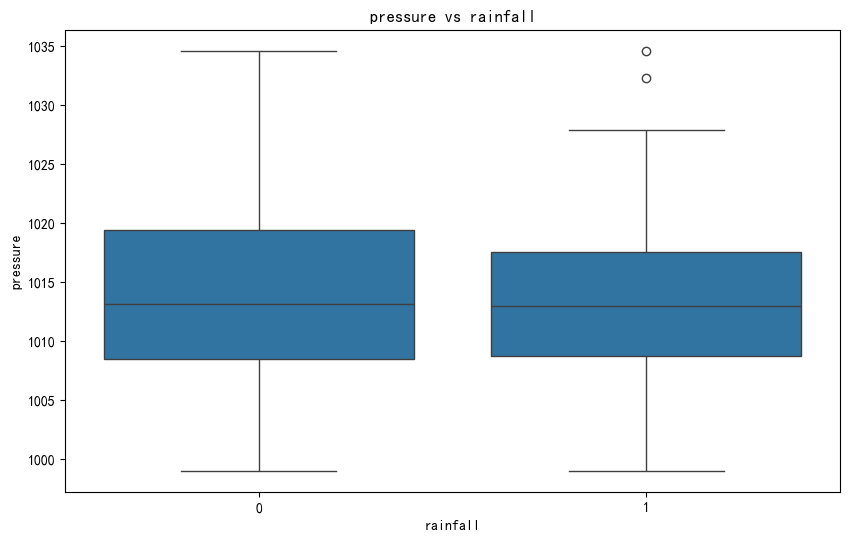

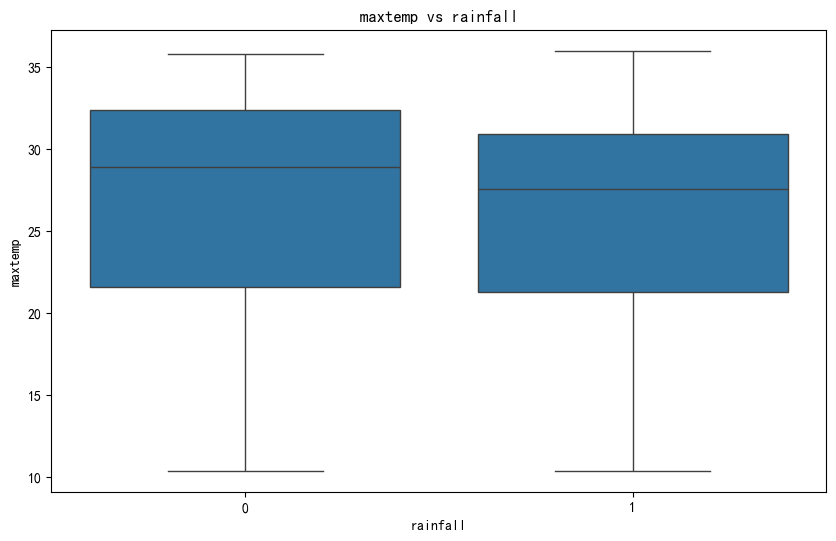

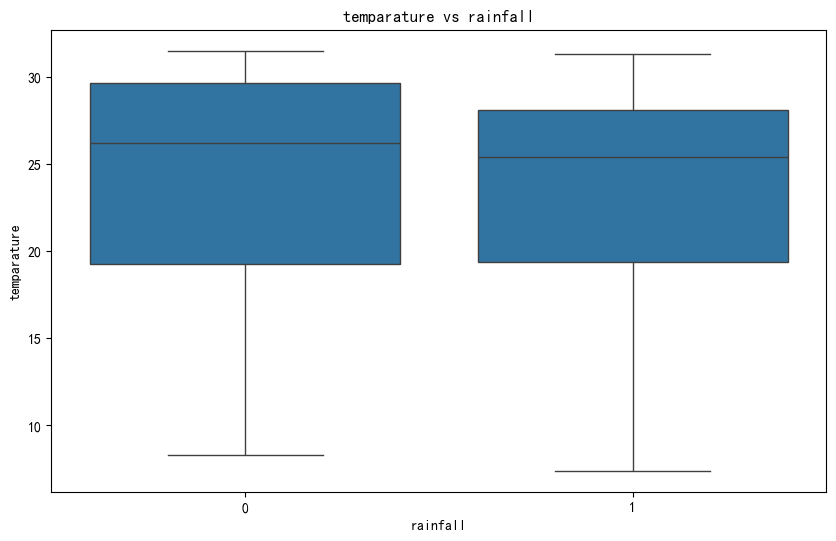

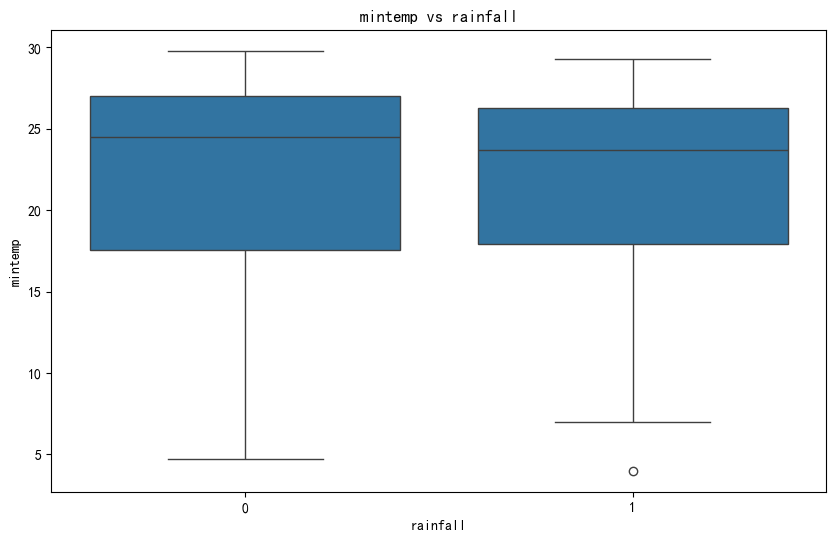

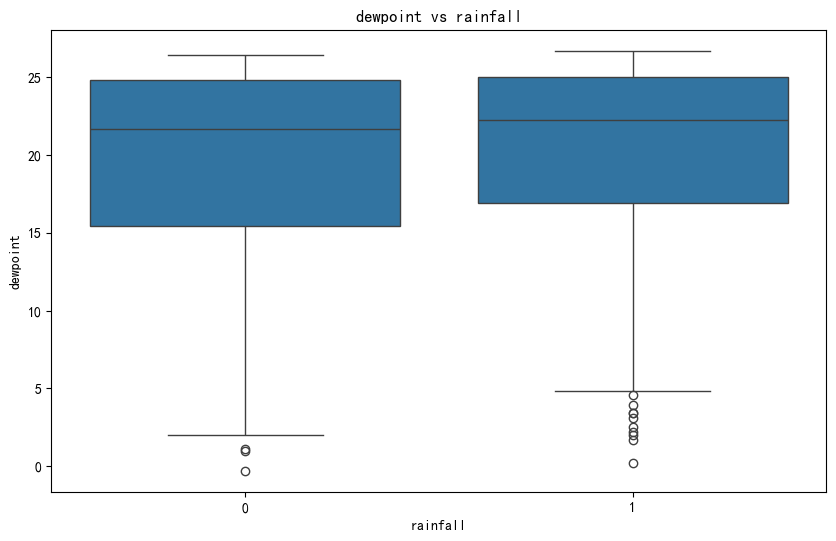

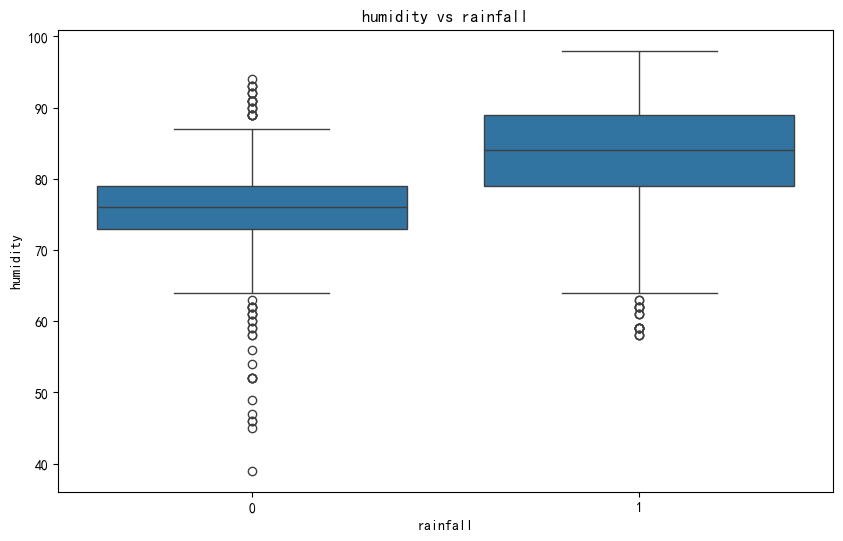

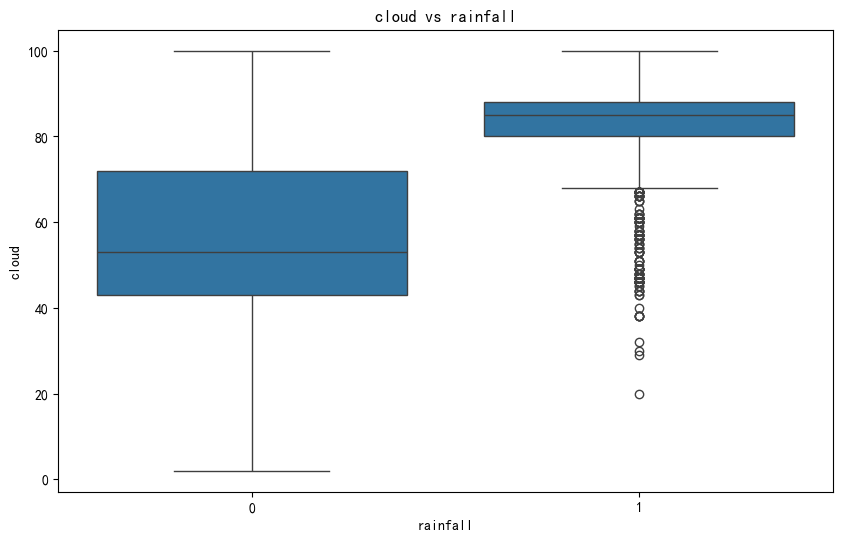

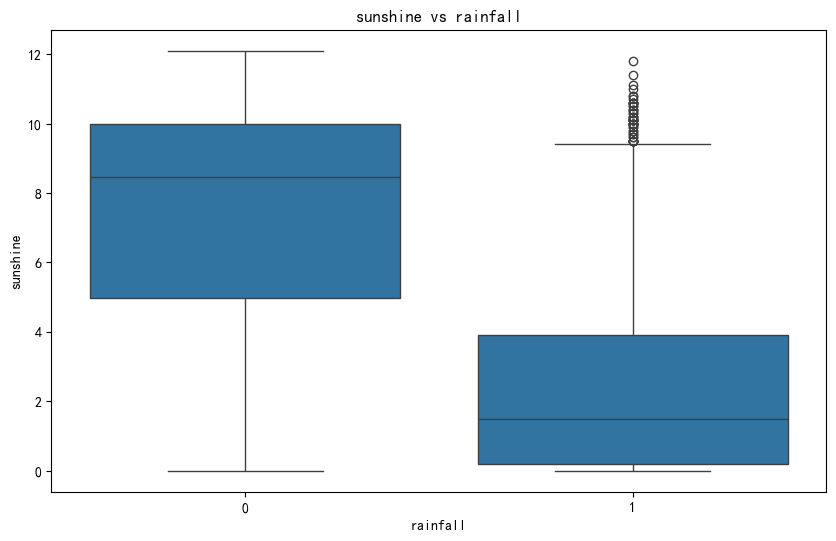

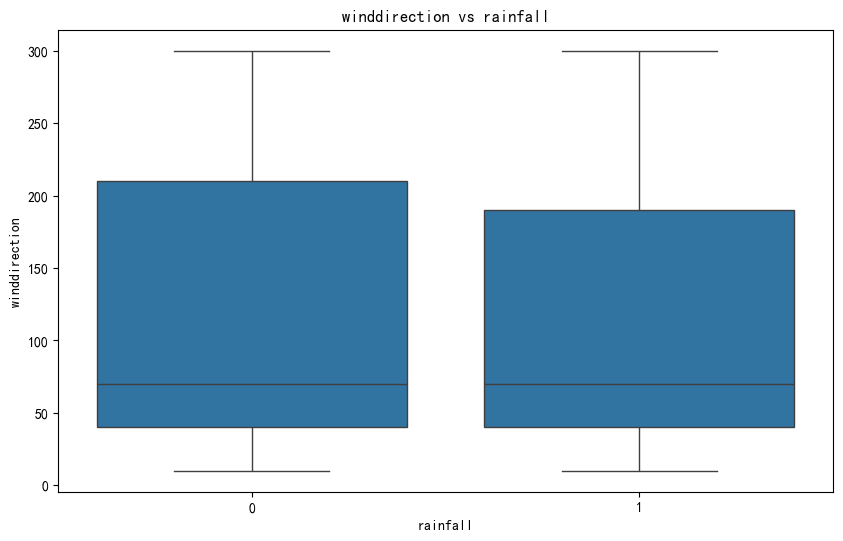

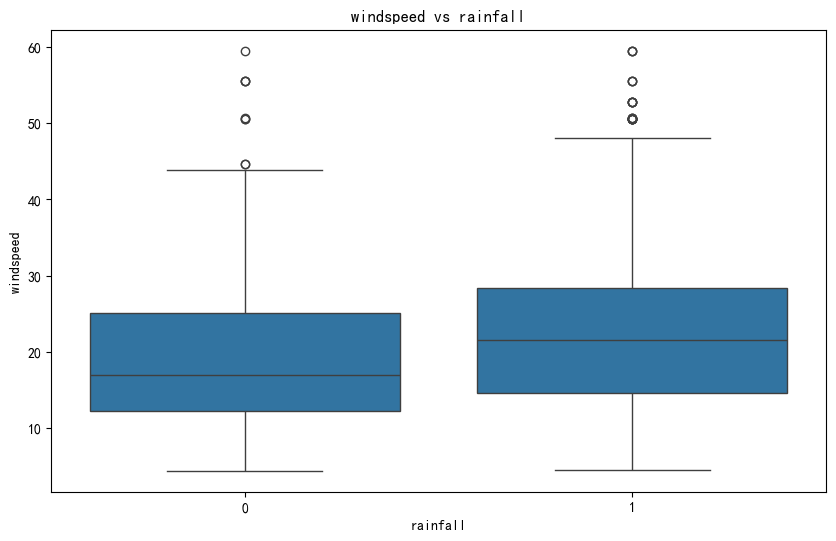

In [7]:
# 特征与目标变量的关系
for feature in features.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data, x='rainfall', y=feature)
    plt.title(f'{feature} vs rainfall')
    plt.show()